<a href="https://colab.research.google.com/github/dhakehruturaj/Topics-in-Generative-AI/blob/main/Lab_Session_2_Classification_and_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Workshop: Topics in Generative AI
## Lab Session 2
## Classification and Clustering

Welcome to the first lab session of the workshop on **Topics in Generative AI**. Today, we will be diving into the fundamental concepts of classification and clustering, two pivotal techniques in the realm of machine learning and artificial intelligence.

### Workshop Overview
This workshop is designed to provide hands-on experience with various generative AI techniques. Over the next few days, we will explore topics ranging from classification and clustering to more advanced concepts like Recurrent Neural Networks (RNNs), Generative Adversarial Networks (GANs), and Diffusion Models. Each lab session is structured to enhance your understanding through practical implementations and interactive learning.

### Lab Session 2: Classification and Clustering

#### Objectives
- **Understand Classification**: Learn the basics of classification, a supervised learning technique used to categorize data into predefined classes.
- **Build a CNN Model**: Implement a Convolutional Neural Network (CNN) model for classification.
- **Explore Model Parameters**: Delve into the various parameters of CNNs to understand their impact on performance.
- **Transfer Learning**: Utilize transfer learning to leverage complex pre-trained CNN architectures for our classification tasks.
- **Introduction to Clustering**: Get an introduction to clustering, an unsupervised learning technique used to group similar data points together.

#### Agenda
1. **Introduction to Classification**
   - Overview of classification
   - Applications and use cases

2. **Building a CNN Model**
   - Implementing a basic CNN model
   - Training and evaluating the model

3. **Model Parameters and Hyperparameter Tuning**
   - Exploring the parameters of CNNs
   - Techniques for hyperparameter tuning

4. **Transfer Learning**
   - Concept of transfer learning
   - Using pre-trained CNN architectures (e.g., VGG, ResNet)

5. **Introduction to Clustering**
   - Overview of clustering techniques
   - Examples of clustering algorithms (e.g., K-Means, Hierarchical Clustering)

By the end of this session, you will have a solid understanding of how to build and optimize a CNN model for classification tasks, and you will be introduced to the basics of clustering techniques.

Let's get started!

---

**Date:** July 21, 2024


Before start lets learn about Gradient Descent Algortihm



In [16]:
z = [-5]
for i in range (1000): z =z + [z[-1] + 0.01]

In [17]:
number = 4

In [18]:
import matplotlib.pyplot as plt

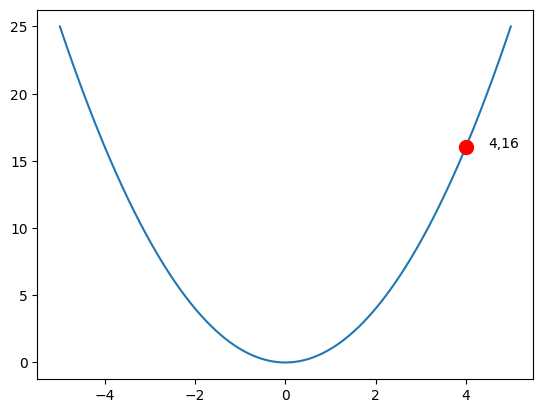

In [19]:
def square(z): return z**2

fig, ax = plt.subplots()
ax.plot(z,[square(i) for i in z])

point = ax.plot(number, square(number), color='red', marker = 'o', markersize = 10)
text = ax.text(number + 0.5, square(number), f'{number},{square(number)}')

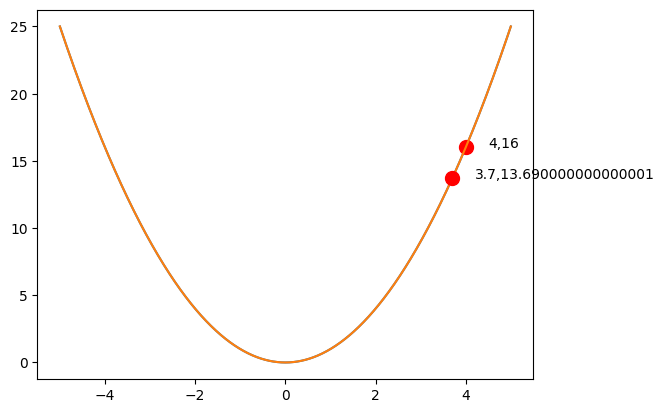

In [20]:
def gradient_of_square(x): return 2*x

number = number - 0.3 if gradient_of_square(number)>0 else number+0.3

ax.plot(z, [square(i) for i in z])
point = ax.plot(number, square(number), color='red', marker = 'o', markersize = 10)
text = ax.text(number + 0.5, square(number), f'{number},{square(number)}')

fig

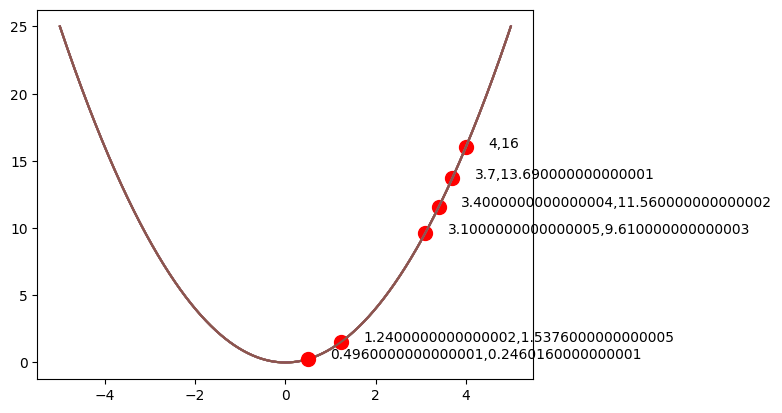

In [11]:
def gradient_of_square(x): return 2*x

number = number - 0.3 *gradient_of_square(number)

ax.plot(z, [square(i) for i in z])
point = ax.plot(number, square(number), color='red', marker = 'o', markersize = 10)
text = ax.text(number + 0.5, square(number), f'{number},{square(number)}')

fig

Import Libraries

In [ ]:
# Import necessary libraries
import torchvision
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Import dataset
mnist_train = torchvision.datasets.MNIST(root='data', train=True, download=True, transform=torchvision.transforms.ToTensor())
mnist_test = torchvision.datasets.MNIST(root='data', train=False, download=True, transform=torchvision.transforms.ToTensor())


You can explore more datasets from pytorch official datasets libraries
for example,
- For image Classification: [Dataset](https://pytorch.org/vision/main/datasets.html#image-classification)
- For text Classification: [Dataset](https://pytorch.org/text/stable/datasets.html#text-classification)
-For language Modelling: [Dataset](https://pytorch.org/text/stable/datasets.html#language-modeling)

In [ ]:
# Create DataLoaders
from torch.utils.data import DataLoader

train_loader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=64, shuffle=False)

In [ ]:
# Define the CNN model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the model
model = SimpleCNN()

Things to do here add few more layes

In [ ]:
print(model)

SimpleCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [ ]:
# Set up training parameters
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3) #1e-3=0.001

Other popular deep learning optimizers you can use

1. Gradient Descent
2. Stochastic Gradient Descent
3. Mini-batch Gradient Descent
4. Adagrad
5. RMS Prop
6. AdaDelta

Click [Here]()

In [ ]:
# Train the model with loss and accuracy tracking
def train(model, train_loader, criterion, optimizer, epochs=5):
    train_loss_list = []
    train_acc_list = []
    test_acc_list = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        avg_loss = running_loss / len(train_loader)
        train_loss_list.append(avg_loss)
        train_acc = 100 * correct_train / total_train
        train_acc_list.append(train_acc)
        print(f'Epoch {epoch+1}, Loss: {avg_loss}, Training Accuracy: {train_acc}%')

        # Evaluate on test data
        correct_test = 0
        total_test = 0
        model.eval()
        with torch.no_grad():
            for images, labels in test_loader:
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                total_test += labels.size(0)
                correct_test += (predicted == labels).sum().item()

        test_acc = 100 * correct_test / total_test
        test_acc_list.append(test_acc)
        print(f'Testing Accuracy: {test_acc}%')

    return train_loss_list, train_acc_list, test_acc_list

# Train the model for 5 epochs and track the loss and accuracy
train_loss_list, train_acc_list, test_acc_list = train(model, train_loader, criterion, optimizer, epochs=5)


Epoch 1, Loss: 0.1707897431049337, Training Accuracy: 94.71833333333333%
Testing Accuracy: 98.1%
Epoch 2, Loss: 0.047275363724417624, Training Accuracy: 98.55666666666667%
Testing Accuracy: 98.65%
Epoch 3, Loss: 0.03371599655790028, Training Accuracy: 98.92333333333333%
Testing Accuracy: 98.86%
Epoch 4, Loss: 0.02511861128834953, Training Accuracy: 99.25666666666666%
Testing Accuracy: 99.1%
Epoch 5, Loss: 0.01839013962494886, Training Accuracy: 99.40166666666667%
Testing Accuracy: 99.16%


**Note:**
- We need to invoke zero_grad() to prevent loss. backward() from accumulating the new gradient values with the ones from the previous step.
-  PyTorch CNN classification models do not just return the one class with the most likely chance of being correct, but rather, the probability for each class?
And, that is why the user must use torch.max to drill down to the one best guess of the model

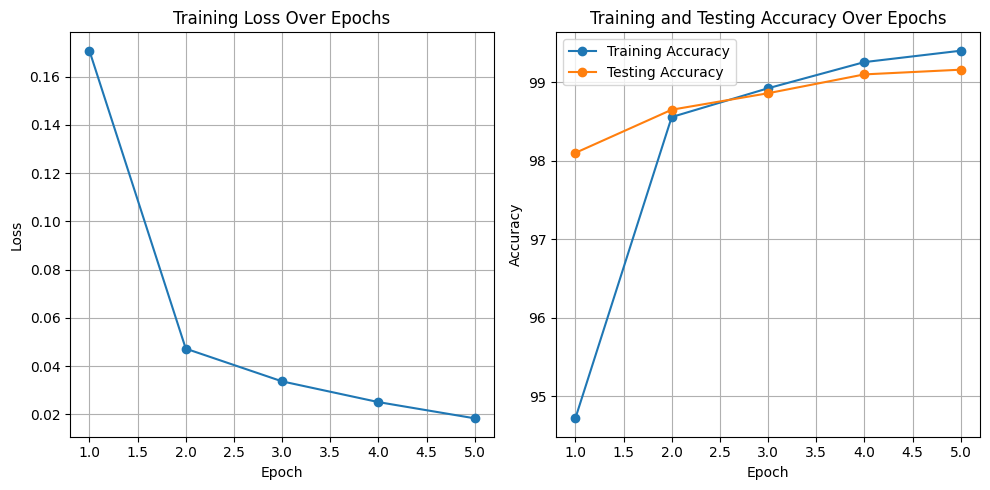

In [ ]:
# Visualize the training and testing accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss_list) + 1), train_loss_list, marker='o')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc_list) + 1), train_acc_list, marker='o', label='Training Accuracy')
plt.plot(range(1, len(test_acc_list) + 1), test_acc_list, marker='o', label='Testing Accuracy')
plt.title('Training and Testing Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Lets see How many parametrs our model have

In [ ]:
from torchsummary import summary
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 28, 28]             320
         MaxPool2d-2           [-1, 32, 14, 14]               0
            Conv2d-3           [-1, 64, 14, 14]          18,496
         MaxPool2d-4             [-1, 64, 7, 7]               0
            Linear-5                  [-1, 128]         401,536
            Linear-6                   [-1, 10]           1,290
Total params: 421,642
Trainable params: 421,642
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.36
Params size (MB): 1.61
Estimated Total Size (MB): 1.97
----------------------------------------------------------------


In [ ]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

conv1.weight tensor([[[[ 0.2394, -0.1900,  0.2623],
          [-0.2993, -0.2603, -0.1241],
          [-0.0918,  0.3029, -0.1677]]],


        [[[-0.1396,  0.2236, -0.2531],
          [-0.2552,  0.0701, -0.2354],
          [ 0.2339, -0.2476, -0.0952]]],


        [[[-0.2527,  0.1942,  0.0984],
          [ 0.2385, -0.0226, -0.0658],
          [-0.2431, -0.2748,  0.1198]]],


        [[[ 0.3179,  0.2764, -0.0746],
          [-0.0918, -0.0792,  0.0546],
          [ 0.0106,  0.1006,  0.1857]]],


        [[[-0.2095,  0.1349,  0.2379],
          [-0.1852, -0.2324, -0.1141],
          [ 0.1895,  0.0190,  0.0818]]],


        [[[-0.3129,  0.2420,  0.0960],
          [ 0.1310,  0.2238,  0.2736],
          [-0.1356,  0.0068, -0.3014]]],


        [[[ 0.2814, -0.2109, -0.0617],
          [ 0.0609, -0.1610,  0.2819],
          [-0.2735,  0.1425, -0.2089]]],


        [[[-0.1184, -0.1731, -0.2042],
          [-0.2954, -0.2875, -0.0963],
          [-0.1181,  0.2059,  0.2720]]],


        [[[-0.2831,

Visualize layers

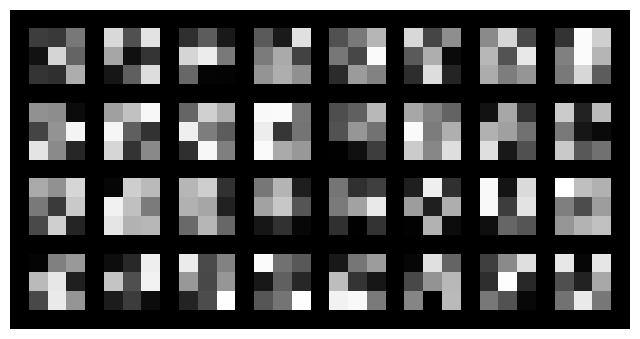

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    n, c, w, h = tensor.shape

    if allkernels:
        tensor = tensor.view(n*c, -1, w, h)
    elif c != 3:
        tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure(figsize=(nrow, rows))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

if __name__ == "__main__":
    layer = 1  # Choose the layer index you want to visualize (e.g., 1 for conv2)
    model = SimpleCNN()

    # Access the weights of the convolutional layer you want to visualize
    if layer == 1:
        filters = model.conv1.weight.data.clone()
    elif layer == 2:
        filters = model.conv2.weight.data.clone()
    else:
        raise ValueError("Invalid layer index. Choose 1 for conv1 or 2 for conv2.")

    # Visualize the filters
    visTensor(filters, ch=0, allkernels=False)

    plt.axis('off')
    plt.ioff()
    plt.show()


## Regularization

### Importance of Regularization Techniques in CNNs

Regularization techniques are crucial in Convolutional Neural Networks (CNNs) to prevent overfitting and improve generalization performance. Overfitting occurs when a model learns not only the underlying patterns in the training data but also noise and random fluctuations. This leads to poor performance on unseen data, despite achieving high accuracy on the training set.

#### What is Regularization?

Regularization is the process of adding a penalty term to the loss function during training to discourage the model from fitting the training data too closely. This penalty encourages the model to generalize better to new, unseen data by reducing its capacity to memorize noise.

#### Significance of Regularization:

1. **Prevents Overfitting:** By limiting the complexity of the model through regularization, we reduce the risk of overfitting. Regularization techniques such as L1 and L2 regularization, dropout, and batch normalization help in achieving this by controlling the weights and biases of the neural network.

2. **Improves Generalization:** A well-regularized model tends to generalize better to unseen data. It learns the underlying patterns in the data rather than noise, which leads to more accurate predictions on new, unseen examples.

3. **Enhances Robustness:** Regularization techniques contribute to the robustness of the model. They help in learning features that are more invariant and less sensitive to small changes or variations in the input data, thereby improving its stability and reliability.

4. **Allows for Deeper Architectures:** With effective regularization, deeper CNN architectures can be trained without encountering significant overfitting issues. This enables the utilization of more complex models that can capture intricate patterns in large datasets.



#### Dropout Regularization

**Description:**
Dropout is a technique used in neural networks to prevent overfitting by randomly dropping units during training. It helps the model generalize better to unseen data by introducing noise and reducing the reliance on specific neurons.

**Implementation in PyTorch:**

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model with Dropout regularization
class CNNWithDropout(nn.Module):
    def __init__(self, dropout_rate):
        super(CNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(dropout_rate)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = self.dropout(x)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

# Instantiate the model with dropout rate of 0.002
model = CNNWithDropout(dropout_rate=0.5)

In [ ]:
print(model)

CNNWithDropout(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


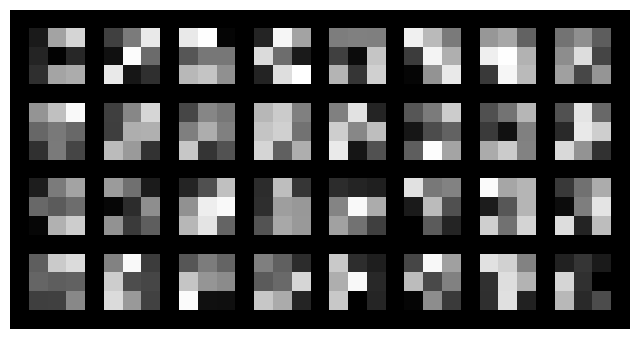

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from torchvision import utils

def visTensor(tensor, ch=0, allkernels=False, nrow=8, padding=1):
    n, c, w, h = tensor.shape

    if allkernels:
        tensor = tensor.view(n*c, -1, w, h)
    elif c != 3:
        tensor = tensor[:,ch,:,:].unsqueeze(dim=1)

    rows = np.min((tensor.shape[0] // nrow + 1, 64))
    grid = utils.make_grid(tensor, nrow=nrow, normalize=True, padding=padding)
    plt.figure(figsize=(nrow, rows))
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

if __name__ == "__main__":
    layer = 1  # Choose the layer index you want to visualize (e.g., 1 for conv2)
    model = CNNWithDropout(dropout_rate=0.002)

    # Access the weights of the convolutional layer you want to visualize
    if layer == 1:
        filters = model.conv1.weight.data.clone()
    elif layer == 2:
        filters = model.conv2.weight.data.clone()
    else:
        raise ValueError("Invalid layer index. Choose 1 for conv1 or 2 for conv2.")

    # Visualize the filters
    visTensor(filters, ch=0, allkernels=False)

    plt.axis('off')
    plt.ioff()
    plt.show()


In [ ]:
# Train the model for 5 epochs and track the loss and accuracy
train_loss_list, train_acc_list, test_acc_list = train(model, train_loader, criterion, optimizer, epochs=5)

Epoch 1, Loss: 2.3087623363364735, Training Accuracy: 5.183333333333334%
Testing Accuracy: 4.8%
Epoch 2, Loss: 2.308767814371886, Training Accuracy: 5.19%
Testing Accuracy: 4.8%
Epoch 3, Loss: 2.308765873980166, Training Accuracy: 5.196666666666666%
Testing Accuracy: 4.8%
Epoch 4, Loss: 2.3087563296116747, Training Accuracy: 5.258333333333334%
Testing Accuracy: 4.8%
Epoch 5, Loss: 2.3087563377453573, Training Accuracy: 5.183333333333334%
Testing Accuracy: 4.8%


#### L1 Regularization

**Description:**
L1 regularization adds a penalty to the loss function based on the absolute values of the model parameters. It encourages sparsity by driving irrelevant weights to zero, promoting a simpler and more interpretable model.

**Implementation in PyTorch:**

In [ ]:
import torch.nn as nn

# Define the CNN model with L1 regularization
class CNNWithL1Regularization(nn.Module):
    def __init__(self, l1_strength):
        super(CNNWithL1Regularization, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.l1_strength = l1_strength

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Add L1 regularization to all linear layers
        l1_penalty = 0
        for param in self.parameters():
            l1_penalty += torch.norm(param, 1)

        return x + self.l1_strength * l1_penalty

# Instantiate the model with L1 regularization strength of 0.01
model = CNNWithL1Regularization(l1_strength=0.01)

In [ ]:
# Train the model for 5 epochs and track the loss and accuracy
train_loss_list, train_acc_list, test_acc_list = train(model, train_loader, criterion, optimizer, epochs=5)

#### L2 Regularization

**Description:**
L2 regularization adds a penalty to the loss function based on the squared values of the model parameters. It encourages smaller weights across all features, reducing the model's sensitivity to outliers and potentially preventing overfitting.


In [ ]:
# Define the CNN model with L2 regularization
class CNNWithL2Regularization(nn.Module):
    def __init__(self, l2_strength=0.01):
        super(CNNWithL2Regularization, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.l2_strength = l2_strength

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)

        # Add L2 regularization to all linear layers
        l2_penalty = 0
        for param in self.parameters():
            l2_penalty += torch.norm(param, 2)

        return x + 0.5 * self.l2_strength * l2_penalty

# Instantiate the model with L2 regularization strength of 0.01
model = CNNWithL2Regularization(l2_strength=0.01)

In [ ]:
# Train the model for 5 epochs and track the loss and accuracy
train_loss_list, train_acc_list, test_acc_list = train(model, train_loader, criterion, optimizer, epochs=5)

Question comes here is this enough? Lets move towards complexity

# Transfer Learning

In this section, we will explore transfer learning, a powerful technique in machine learning where a pre-trained model is adapted for a different but related task. We will leverage pre-trained weights from a well-known model and fine-tune it for our specific use case. This approach allows us to benefit from the extensive training the pre-trained model has already undergone, reducing training time and improving performance on our target task.

We will demonstrate this by using a pre-trained **ResNet-50** model and adapting it for the MNIST dataset. Let's dive in and see how transfer learning can be effectively implemented in PyTorch.








In [ ]:
#Import neccessary libraries

import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor, Normalize
from torchvision.datasets import MNIST, CIFAR10
from torch.utils.data import DataLoader


In [ ]:
for param in model.parameters():
    param.requires_grad = False

We need to transform our dataset to make perfect fit input to the resnet50 architecture

In [ ]:
from torchvision.transforms.functional import pad

transform_train = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB format
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize as before
])

transform_test = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert to RGB format
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [ ]:
train_dataset = MNIST(root='./data', train=True, download=True, transform=transform_train)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

In [ ]:
class CustomResNet(nn.Module):
    def __init__(self):
        super(CustomResNet, self).__init__()
        self.resnet = torch.hub.load('pytorch/vision', 'resnet50', pretrained=True)
        self.features = nn.Sequential(*list(self.resnet.children())[:-1])
        self.classifier = nn.Linear(self.resnet.fc.in_features, 10)

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = CustomResNet()
print(model)

Downloading: "https://github.com/pytorch/vision/zipball/main" to /root/.cache/torch/hub/main.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 92.2MB/s]


CustomResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
summary(model,(3,32,32))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 16, 16]           9,408
            Conv2d-2           [-1, 64, 16, 16]           9,408
       BatchNorm2d-3           [-1, 64, 16, 16]             128
       BatchNorm2d-4           [-1, 64, 16, 16]             128
              ReLU-5           [-1, 64, 16, 16]               0
              ReLU-6           [-1, 64, 16, 16]               0
         MaxPool2d-7             [-1, 64, 8, 8]               0
         MaxPool2d-8             [-1, 64, 8, 8]               0
            Conv2d-9             [-1, 64, 8, 8]           4,096
           Conv2d-10             [-1, 64, 8, 8]           4,096
      BatchNorm2d-11             [-1, 64, 8, 8]             128
      BatchNorm2d-12             [-1, 64, 8, 8]             128
             ReLU-13             [-1, 64, 8, 8]               0
             ReLU-14             [-1, 6

In [ ]:
# Enable gradient computation for the last few layers
for param in model.resnet.layer4.parameters():
    param.requires_grad = True

# Train the model
model.train()

CustomResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
      

In [ ]:
# Fine-tuning
num_epochs = 5
train_losses = []
train_correct = 0
train_total = 0
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracy = train_correct / train_total
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}')

print(f'Finished fine-tuning with {train_accuracy} accuracy')

Epoch 1/5, Loss: 0.13471526884313015
Epoch 2/5, Loss: 0.058753369109971185
Epoch 3/5, Loss: 0.04354627338249975


In [ ]:
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform_test)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)  # Don't shuffle test data

# Initialize variables for tracking performance
test_losses = []
correct = 0
total = 0

# Loop through epochs for testing
for epoch in range(num_epochs):
    with torch.no_grad():
        running_loss = 0.0

        # Evaluate the model on the test set
        for images, labels in test_loader:
            # Forward pass (no need for gradients during testing)
            outputs = model(images)

            # Calculate loss (assuming your loss function is defined)
            loss = criterion(outputs, labels)

            # Update running loss
            running_loss += loss.item()

            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)  # Get the index of the maximum value
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Calculate average loss for the epoch
        test_loss = running_loss / len(test_loader.dataset)
        test_losses.append(test_loss)

    # Print epoch-wise performance (optional)
    print(f'Epoch {epoch+1} - Test Loss: {test_loss:.4f}')

# Calculate and print overall test accuracy
test_accuracy = correct / total
print(f'Accuracy of the model on the test set: {test_accuracy:.4f}')

**Note:**
- Shuffling the data is essential for machine learning tasks as it promotes unbiased training, ensures randomness in batch selection, improves generalization to unseen data, helps break inherent patterns, and mitigates overfitting.
- You don't need to shuffle the validation and test datasets, since no training is done

---
# Unsupervised Learning and Clustering Algorithms

In the thid part of the session, we'll shift our focus to unsupervised machine learning. You will discover the potential of clustering algorithms in revealing patterns and structures within data. We will explore state-of-the-art clustering techniques and see how they can be applied to various datasets.

By the end of this lab session, you will have gained hands-on experience with both supervised and unsupervised learning techniques, equipping you with the knowledge to apply these powerful tools in your own projects.

Let's get started and dive into the world of classification and clustering!


Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.

Many clustering algorithms are available in Scikit-Learn and elsewhere, but perhaps the simplest to understand is an algorithm known as *k-means clustering*, which is implemented in `sklearn.cluster.KMeans`.

We begin with the standard imports:

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-16-cd9e54b682e8>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


## K-means Algorithm

The *k*-means algorithm searches for a predetermined number of clusters within an unlabeled multidimensional dataset.
It accomplishes this using a simple conception of what the optimal clustering looks like:

- The *cluster center* is the arithmetic mean of all the points belonging to the cluster.
- Each point is closer to its own cluster center than to other cluster centers.

Those two assumptions are the basis of the *k*-means model.
We will soon dive into exactly *how* the algorithm reaches this solution, but for now let's take a look at a simple dataset and see the *k*-means result.

First, let's generate a two-dimensional dataset containing four distinct blobs.
To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization (see the following figure):

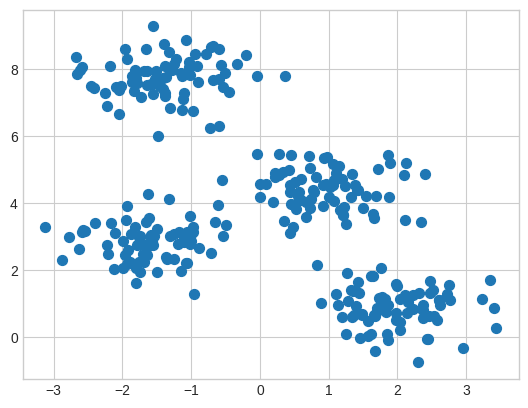

In [ ]:
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

Let's visualize the results by plotting the data colored by these labels (the following figure).
We will also plot the cluster centers as determined by the *k*-means estimator:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


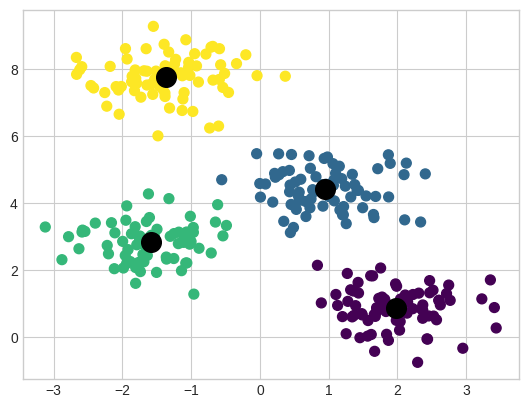

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualization

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);

The *k*-means algorithm (at least in this simple case) assigns the points to clusters very similarly to how we might assign them by eye.
But you might wonder how this algorithm finds these clusters so quickly: after all, the number of possible combinations of cluster assignments is exponential in the number of data points—an exhaustive search would be very, very costly.
Fortunately for us, such an exhaustive search is not necessary: instead, the typical approach to *k*-means involves an intuitive iterative approach known as *expectation–maximization*.

## Expectation–Maximization

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers.
2. Repeat until converged:
   1. *E-step*: Assign points to the nearest cluster center.
   2. *M-step*: Set the cluster centers to the mean of their assigned points.

Here the *E-step* or *expectation step* is so named because it involves updating our expectation of which cluster each point belongs to.
The *M-step* or *maximization step* is so named because it involves maximizing some fitness function that defines the locations of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
For the particular initialization shown here, the clusters converge in just three iterations.


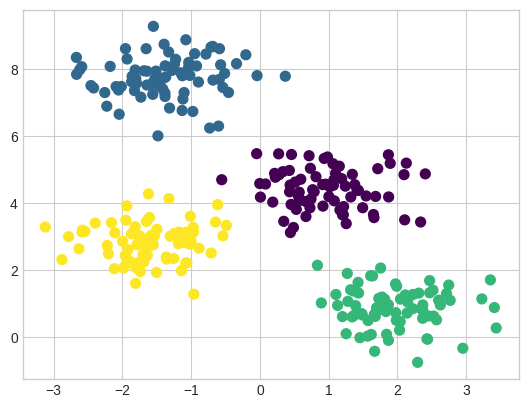

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)

        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])

        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers

    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Most well-tested implementations will do a bit more than this under the hood, but the preceding function gives the gist of the expectation–maximization approach.

There are a few caveats to be aware of when using the expectation–maximization algorithm:

#### The globally optimal result may not be achieved
First, although the E–M procedure is guaranteed to improve the result in each step, there is no assurance that it will lead to the *global* best solution.
For example, if we use a different random seed in our simple procedure, the particular starting guesses lead to poor results (see the following figure):

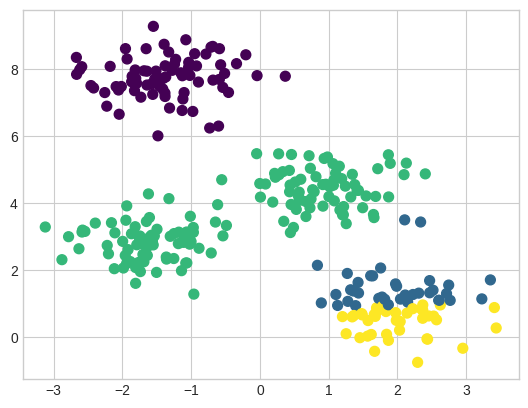

In [ ]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

Here the E–M approach has converged, but has not converged to a globally optimal configuration. For this reason, it is common for the algorithm to be run for multiple starting guesses, as indeed Scikit-Learn does by default (the number is set by the ``n_init`` parameter, which defaults to 10).

#### The number of clusters must be selected beforehand
Another common challenge with *k*-means is that you must tell it how many clusters you expect: it cannot learn the number of clusters from the data.
For example, if we ask the algorithm to identify six clusters, it will happily proceed and find the best six clusters, as shown in Figure 47-6:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


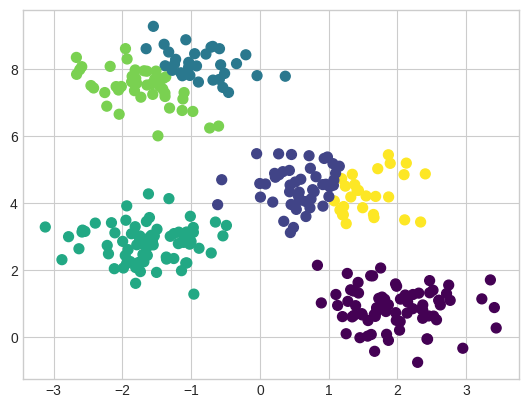

In [ ]:
labels = KMeans(6, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### k-means is limited to linear cluster boundaries
The fundamental model assumptions of *k*-means (points will be closer to their own cluster center than to others) means that the algorithm will often be ineffective if the clusters have complicated geometries.

In particular, the boundaries between *k*-means clusters will always be linear, which means that it will fail for more complicated boundaries.
Consider the following data, along with the cluster labels found by the typical *k*-means approach (see the following figure):

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


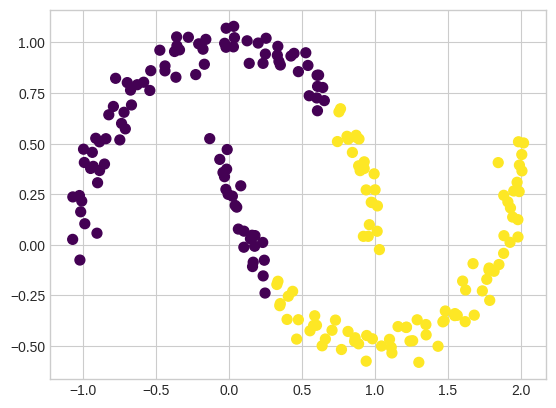

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Spectralclustering


We might imagine using the same trick to allow *k*-means to discover non-linear boundaries.

One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm (see the following figure):

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


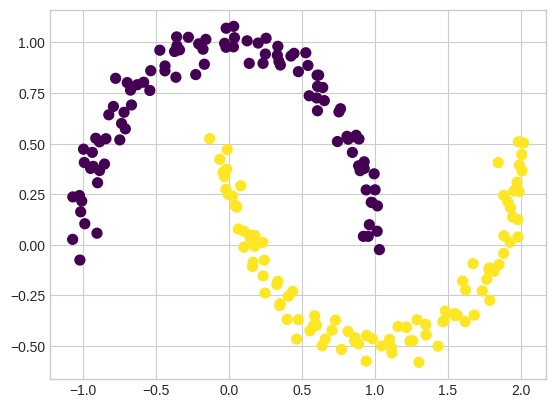

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

#### k-means can be slow for large numbers of samples
Because each iteration of *k*-means must access every point in the dataset, the algorithm can be relatively slow as the number of samples grows.
You might wonder if this requirement to use all data at each iteration can be relaxed; for example, you might just use a subset of the data to update the cluster centers at each step.
This is the idea behind batch-based *k*-means algorithms, one form of which is implemented in `sklearn.cluster.MiniBatchKMeans`.
The interface for this is the same as for standard `KMeans`; we will see an example of its use as we continue our discussion.

### Example 1: k-Means on Digits

To start, let's take a look at applying *k*-means on the same simple digits data.
Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the dataset, then find the clusters.
Recall that the digits dataset consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8 × 8 image:

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can be interpreted as representing the "typical" digit within the cluster.
Let's see what these cluster centers look like (see the following figure):

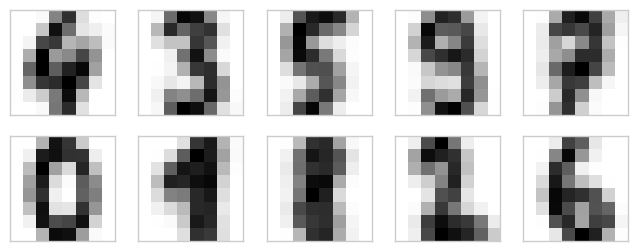

In [ ]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 1 and 8.

Because *k*-means knows nothing about the identities of the clusters, the 0–9 labels may be permuted.
We can fix this by matching each learned cluster label with the true labels found in the clusters:

In [ ]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

With just a simple *k*-means algorithm, we discovered the correct grouping for 80% of the input digits!
Let's check the confusion matrix for this, visualized in the following figure:

Text(118.78333333333332, 0.5, 'predicted label')

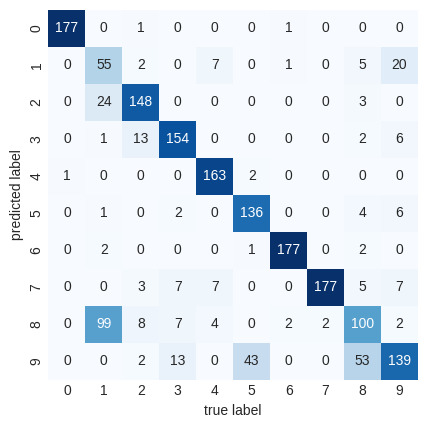

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d',
            cbar=False, cmap='Blues',
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

As we might expect from the cluster centers we visualized before, the main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding algorithm to preprocess the data before performing *k*-means.
t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.
Let's see how it does:

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7935447968836951

In [ ]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random',
            learning_rate='auto',random_state=0)
digits_proj = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, labels)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.9415692821368948

Refrences:
1. Pytorch documentation : [Link](https://pytorch.org/docs/stable/nn.html)
2. To learn about CNN more: [Read this article and try to implement](https://webcache.googleusercontent.com/search?q=cache:https://medium.com/latinxinai/convolutional-neural-network-from-scratch-6b1c856e1c07)
3. Transfer learning: [Link](https://www.geeksforgeeks.org/how-to-implement-transfer-learning-in-pytorch/)
4. Python Data Science Handbook by Jake Vanderplast
5. To explore more about different clustering: [Link](https://www.freecodecamp.org/news/8-clustering-algorithms-in-machine-learning-that-all-data-scientists-should-know/)


# Things to Do

1. Implement CNN classification with CIFAR 10 Dataset
2. What happens if you implement Regularization techniques of CNN architectures like ResNet50?
3. Implement transfer learning on MNIST, CIFAR 10 with VGG16, InceptionV3, EfficientNetB0, XceptionNet and DenseNet model
4. Try different clustering algorithms like DBSCN, Agglomerative Clustering
